In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [9]:
data = pd.read_csv('data1.txt', sep=",", header=None)
x_train = data.iloc[0:, 0:1].to_numpy()
y_train = data.iloc[0:, 1].to_numpy()
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [10]:
def compute_cost(x, y, w, b) :
    m = x.shape[0]
    total_cost = 0.
    for i in range(m) :
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost /= (2*m)
    return total_cost

In [14]:
def compute_gradient(x, y, w, b) :
    m = x.shape[0]
    dj_db = 0
    dj_dw = 0
    for i in range(m) :
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [17]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters) :
    w_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    dj_dw = 0
    dj_db = 0
    for i in range(num_iters):
        
        dj_db, dj_dw = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history

In [18]:
initial_w = 0.
initial_b = 0.
iterations = 1500
alpha = 0.01
J_history = []
w,b, J_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: [1.16636235] [-3.63029144]


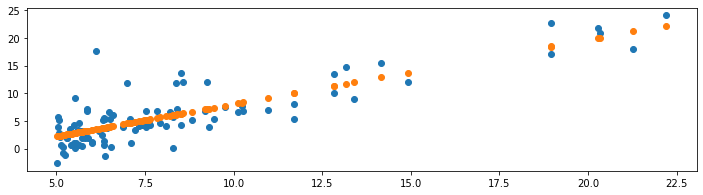

In [23]:
y_pred = np.dot(x_train, w) + b
fig, ax = plt.subplots(1, 1, figsize=(12, 3), sharey = True)
ax.scatter(X_train[:,0], y_train, label = 'target')
ax.scatter(X_train[:,0],y_pred, label = 'predict')
plt.show()